In [12]:
import numpy
from matplotlib import pyplot

In [25]:
pyplot.rcParams['image.cmap'] = 'gray'
pyplot.rcParams['image.interpolation'] = 'nearest'

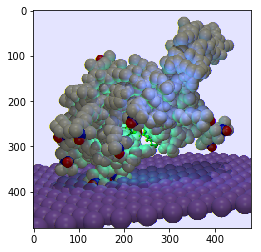

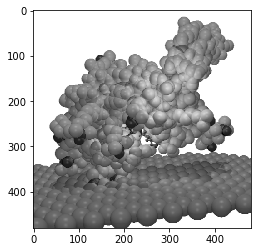

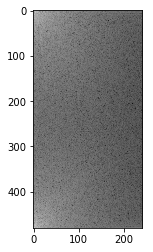

In [35]:
def plot_image(image):
    pyplot.imshow(image)
    pyplot.show()
    
def roll_spectrum(spectrum):
    n, m = spectrum.shape
    spectrum = numpy.roll(spectrum, n//2, axis=0)
    spectrum = numpy.roll(spectrum, m//2, axis=1)
    return spectrum

def plot_spectrum(spectrum):
    roll_spectrum(spectrum)
    plot_image(numpy.log(numpy.absolute(spectrum)))
    
def recover_image(image_fft):
    image_recovered = numpy.fft.irfft2(image_fft)
    plot_image(image_recovered.real)
    return image_recovered.real
    
def normalize(array):
    return array / numpy.max(numpy.abs(array))

import matplotlib.image
image = matplotlib.image.imread(r"C:\Users\Gavin\Desktop\Code\Python\other_projects\flatten\flatten\samples\images\glow.tiff")
image_grey = image.sum(axis=2)
image_grey_fft = numpy.fft.rfft2(image_grey)

plot_image(image)
plot_image(image_grey)
plot_spectrum(image_grey_fft)

Uncompressed Image


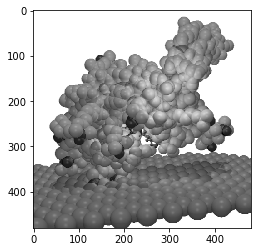

Compressed Image


In [36]:
def previewCompression(input_image_fft, cutoff_amplitude=1e5, verbose=False):
    # 0 out all components below the cutoff
    output_image_fft = input_image_fft.copy()
    numpy.place(output_image_fft, abs(output_image_fft) < cutoff_amplitude, [0])
    
    if verbose: 
        recover_image(output_image_fft)  # Display compressed image
        
        # Display information on the compression of the image
        original_size = output_image_fft.shape[0]*output_image_fft.shape[1]
        components_removed = numpy.argwhere(abs(output_image_fft) < cutoff_amplitude).shape[0]
        percent_removed = (1-components_removed/original_size)*100
        print("Removed {} out of {} components. Image contains {}% of the original components.".format(components_removed, original_size, percent_removed))
    
    return output_image_fft

print("Uncompressed Image")
plot_image(image_grey)

print("Compressed Image")
image_compressed_fft = previewCompression(image_grey_fft, verbose=False)

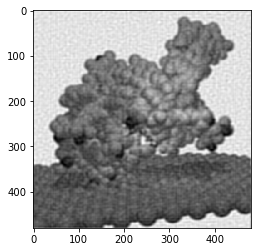

In [37]:
matplotlib.image.imsave('new_otter.jpg', recover_image(image_compressed_fft))

In [ ]:
import 

In [38]:
image = matplotlib.image.imread(r"C:\Users\Gavin\Desktop\Code\Python\other_projects\flatten\flatten\samples\images\glow.tiff")

In [39]:
matplotlib.image.imsave('glow_bnw.tiff', cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))